<a href="https://colab.research.google.com/github/MGARCIAH6/Tareas-MN/blob/main/Epidemia(2_0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Marlene García Hernández (Epidemi 2.0)

In [ ]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [ ]:
def traza3natural(xi,yi):
    n = len(xi)

                #H
    h = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        h[j] = xi[j+1] - xi[j]

                     # ecuaciones
    A = np.zeros(shape=(n-2,n-2), dtype = float)
    B = np.zeros(n-2, dtype = float)
    S = np.zeros(n, dtype = float)

    A[0,0] = 2*(h[0]+h[1])
    A[0,1] = h[1]
    B[0] = 6*((yi[2]-yi[1])/h[1] - (yi[1]-yi[0])/h[0])

    for i in range(1,n-3,1):
        A[i,i-1] = h[i]
        A[i,i] = 2*(h[i]+h[i+1])
        A[i,i+1] = h[i+1]
        factor21 = (yi[i+2]-yi[i+1])/h[i+1]
        factor10 = (yi[i+1]-yi[i])/h[i]
        B[i] = 6*(factor21 - factor10)

    A[n-3,n-4] = h[n-3]
    A[n-3,n-3] = 2*(h[n-3]+h[n-2])
    factor12 = (yi[n-1]-yi[n-2])/h[n-2]
    factor23 = (yi[n-2]-yi[n-3])/h[n-3]
    B[n-3] = 6*(factor12 - factor23)

                    # simplificacion de ecu
    r = np.linalg.solve(A,B)
    for j in range(1,n-1,1):
        S[j] = r[j-1]
    S[0] = 0
    S[n-1] = 0

                         # coeficientes
    a = np.zeros(n-1, dtype = float)
    b = np.zeros(n-1, dtype = float)
    c = np.zeros(n-1, dtype = float)
    d = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        a[j] = (S[j+1]-S[j])/(6*h[j])
        b[j] = S[j]/2
        factor10 = (yi[j+1]-yi[j])/h[j]
        c[j] = factor10 - (2*h[j]*S[j]+h[j]*S[j+1])/6
        d[j] = yi[j]


    x = sym.Symbol('x')
    px_tabla = []
    for j in range(0,n-1,1):

        pxtramo = a[j]*(x-xi[j])**3 + b[j]*(x-xi[j])**2
        pxtramo = pxtramo + c[j]*(x-xi[j])+ d[j]

        pxtramo = pxtramo.expand()
        px_tabla.append(pxtramo)

    return(px_tabla)


            # datos
xi = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
fi = np.array([1,3,6,25,73,222,294,258,237,191,125,69,27,11,4])
muestras = 10


n = len(xi)
px_tabla = traza3natural(xi,fi)

            # resultado
print('Polinomios por tramos: ')
for tramo in range(1,n,1):
    print(' x = ['+str(xi[tramo-1])
          +','+str(xi[tramo])+']')
    print(str(px_tabla[tramo-1]))

            #imagen
xtraza = np.array([])
ytraza = np.array([])
tramo = 1
while not(tramo>=n):
    a = xi[tramo-1]
    b = xi[tramo]
    xtramo = np.linspace(a,b,muestras)


    pxtramo = px_tabla[tramo-1]
    pxt = sym.lambdify('x',pxtramo)
    ytramo = pxt(xtramo)

    # vectores de trazador en x,y
    xtraza = np.concatenate((xtraza,xtramo))
    ytraza = np.concatenate((ytraza,ytramo))
    tramo = tramo + 1



Polinomios por tramos: 
 x = [0,1]
-0.907921961194125*x**3 + 2.90792196119412*x + 1.0
 x = [1,2]
5.53960980597062*x**3 - 19.3425953014942*x**2 + 22.2505172626884*x - 5.44753176716475
 x = [2,3]
-6.25051726268837*x**3 + 51.3981671104597*x**2 - 119.23100756122*x + 88.8734847821072
 x = [3,4]
32.4624592447828*x**3 - 297.018621456781*x**2 + 926.019358140503*x - 956.376880919615
 x = [4,5]
-51.599319716443*x**3 + 711.722726077929*x**2 - 3108.94603199834*x + 4423.57697259884
 x = [5,6]
-4.06518037901074*x**3 - 1.28936398355498*x**2 + 456.114418309082*x - 1518.19044458019
 x = [6,7]
36.860041232486*x**3 - 737.943352990496*x**2 + 4876.03835235073*x - 10358.0383126635
 x = [7,8]
-20.3749845509333*x**3 + 463.992188461308*x**2 - 3537.5104378119*x + 9273.57553104932
 x = [8,9]
4.63989697124709*x**3 - 136.36496807102*x**2 + 1265.34681444673*x - 3534.04380830703
 x = [9,10]
6.81539666594491*x**3 - 195.103459827862*x**2 + 1793.9932402583*x - 5119.98308574174
 x = [10,11]
-1.90148363502675*x**3 + 66.4

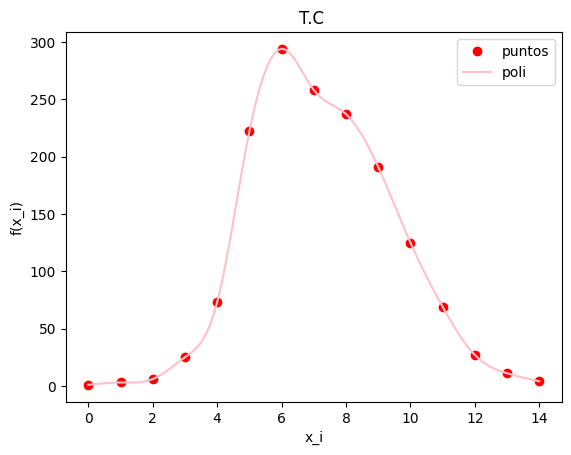

In [ ]:
# Gráfica
plt.plot(xi,fi,'ro', label='puntos')
plt.plot(xtraza,ytraza, label='poli'
         , color='pink')
plt.title('T.C ')
plt.xlabel('x_i')
plt.ylabel('f(x_i)')
plt.legend()
plt.show()